In [3]:
wine <- readRDS('wine_100.RDS')
overfit = read.csv('overfit.csv')
library(caret)

Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.2"Loading required package: ggplot2


In [6]:
# Fit random forest: model
model <- train(
  quality ~ .,
  tuneLength = 3, #RF has primary tuning parameter: mtry: number of randomly selected preidctors
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
model

+ Fold1: mtry= 2, min.node.size=5, splitrule=variance 
- Fold1: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 7, min.node.size=5, splitrule=variance 
- Fold1: mtry= 7, min.node.size=5, splitrule=variance 
+ Fold1: mtry=12, min.node.size=5, splitrule=variance 
- Fold1: mtry=12, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry= 7, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 7, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry=12, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=12, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=5, splitrule=variance 
- Fold2: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold2: mtry= 7, min.node.size=5, splitrule=variance 
- Fold2: mtry= 7, min.node.size=5, splitrule=variance 
+ Fold2: mtry=12, min.node.size=5, splitrule=variance 
- Fold2: mtry=12, min.node.size=5, splitrule=variance

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 79, 80, 81, 80, 80 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE      
   2    variance    0.6676594  0.2746904  0.5149231
   2    extratrees  0.6987803  0.2063664  0.5263449
   7    variance    0.6580047  0.2893487  0.5129431
   7    extratrees  0.6813752  0.2383825  0.5268090
  12    variance    0.6482414  0.3104913  0.5076911
  12    extratrees  0.6807393  0.2426137  0.5342157

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 12, splitrule = variance
 and min.node.size = 5.

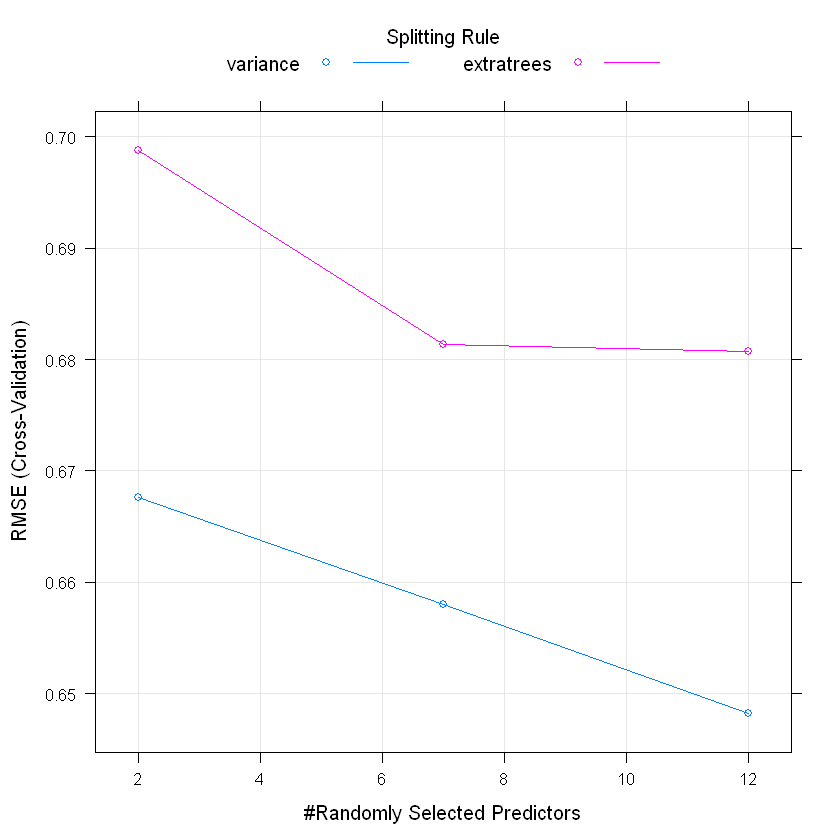

In [7]:
# Plot model
plot(model)

## CUSTOM TUNING

In [8]:
# Fit random forest: model
model <- train(
  quality ~ .,
  tuneGrid = data.frame(mtry = c(2,3,7), splitrule = "variance", min.node.size = 5),
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
model

+ Fold1: mtry=2, splitrule=variance, min.node.size=5 
- Fold1: mtry=2, splitrule=variance, min.node.size=5 
+ Fold1: mtry=3, splitrule=variance, min.node.size=5 
- Fold1: mtry=3, splitrule=variance, min.node.size=5 
+ Fold1: mtry=7, splitrule=variance, min.node.size=5 
- Fold1: mtry=7, splitrule=variance, min.node.size=5 
+ Fold2: mtry=2, splitrule=variance, min.node.size=5 
- Fold2: mtry=2, splitrule=variance, min.node.size=5 
+ Fold2: mtry=3, splitrule=variance, min.node.size=5 
- Fold2: mtry=3, splitrule=variance, min.node.size=5 
+ Fold2: mtry=7, splitrule=variance, min.node.size=5 
- Fold2: mtry=7, splitrule=variance, min.node.size=5 
+ Fold3: mtry=2, splitrule=variance, min.node.size=5 
- Fold3: mtry=2, splitrule=variance, min.node.size=5 
+ Fold3: mtry=3, splitrule=variance, min.node.size=5 
- Fold3: mtry=3, splitrule=variance, min.node.size=5 
+ Fold3: mtry=7, splitrule=variance, min.node.size=5 
- Fold3: mtry=7, splitrule=variance, min.node.size=5 
+ Fold4: mtry=2, splitrule=v

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 80, 79, 80, 81 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.6510631  0.3252362  0.4924728
  3     0.6421363  0.3410173  0.4873834
  7     0.6283957  0.3423119  0.4837944

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 7, splitrule = variance
 and min.node.size = 5.

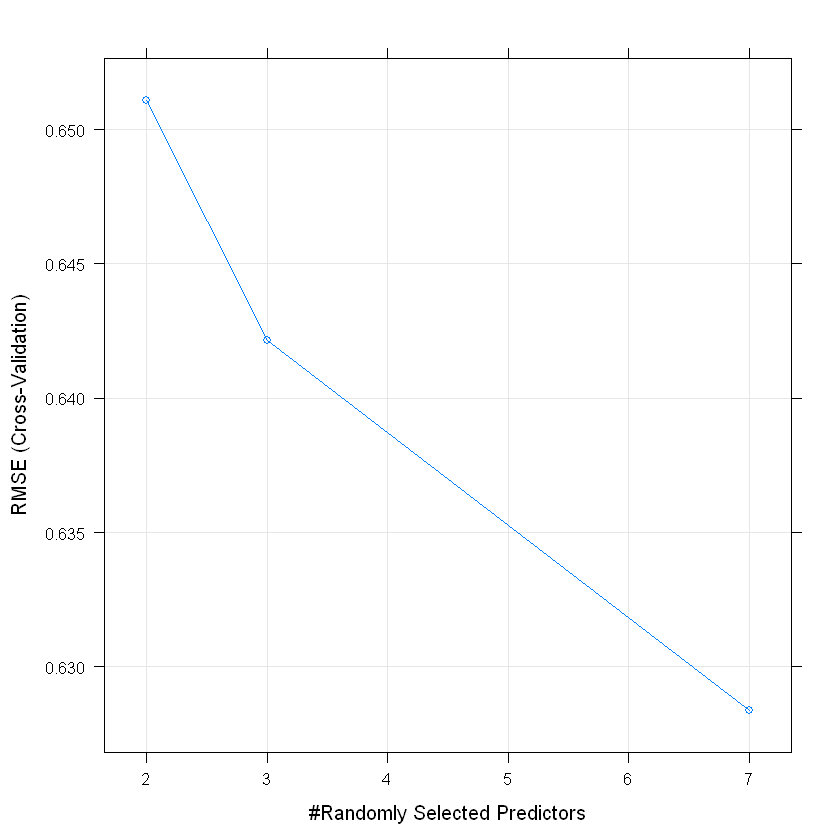

In [9]:
# Plot model
plot(model)

## TUNE GLMNET

In [11]:
# Create custom trainControl: myControl
myControl <- trainControl(
  method = "cv", number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

# Fit glmnet model: model
model <- train(
  y ~ ., data = overfit,
  method = "glmnet",
  trControl = myControl
)

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0.10, lambda=0.01013 
- Fold01: alpha=0.10, lambda=0.01013 
+ Fold01: alpha=0.55, lambda=0.01013 
- Fold01: alpha=0.55, lambda=0.01013 
+ Fold01: alpha=1.00, lambda=0.01013 
- Fold01: alpha=1.00, lambda=0.01013 
+ Fold02: alpha=0.10, lambda=0.01013 
- Fold02: alpha=0.10, lambda=0.01013 
+ Fold02: alpha=0.55, lambda=0.01013 
- Fold02: alpha=0.55, lambda=0.01013 
+ Fold02: alpha=1.00, lambda=0.01013 
- Fold02: alpha=1.00, lambda=0.01013 
+ Fold03: alpha=0.10, lambda=0.01013 
- Fold03: alpha=0.10, lambda=0.01013 
+ Fold03: alpha=0.55, lambda=0.01013 
- Fold03: alpha=0.55, lambda=0.01013 
+ Fold03: alpha=1.00, lambda=0.01013 
- Fold03: alpha=1.00, lambda=0.01013 
+ Fold04: alpha=0.10, lambda=0.01013 
- Fold04: alpha=0.10, lambda=0.01013 
+ Fold04: alpha=0.55, lambda=0.01013 
- Fold04: alpha=0.55, lambda=0.01013 
+ Fold04: alpha=1.00, lambda=0.01013 
- Fold04: alpha=1.00, lambda=0.01013 
+ Fold05: alpha=0.10, lambda=0.01013 
- Fold05: alpha=0.10, lambda=0.01013 
+ Fold05: al

In [12]:
# Print model to console
model

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 226, 225, 225, 224, 225, 224, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens  Spec     
  0.10   0.0001012745  0.4034420  0     0.9612319
  0.10   0.0010127448  0.4054348  0     0.9697464
  0.10   0.0101274483  0.4074275  0     0.9784420
  0.55   0.0001012745  0.3360507  0     0.9275362
  0.55   0.0010127448  0.3381341  0     0.9530797
  0.55   0.0101274483  0.3682971  0     0.9659420
  1.00   0.0001012745  0.3170290  0     0.9192029
  1.00   0.0010127448  0.3277174  0     0.9403986
  1.00   0.0101274483  0.3749094  0     0.9788043

ROC was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.1 and lambda = 0.01012745.

- Default tuning: 3 alpha, 3 lambda
- alpha[0,1]: pure lasso to pure ridge
- lambda (0, infinity): size of the penalty

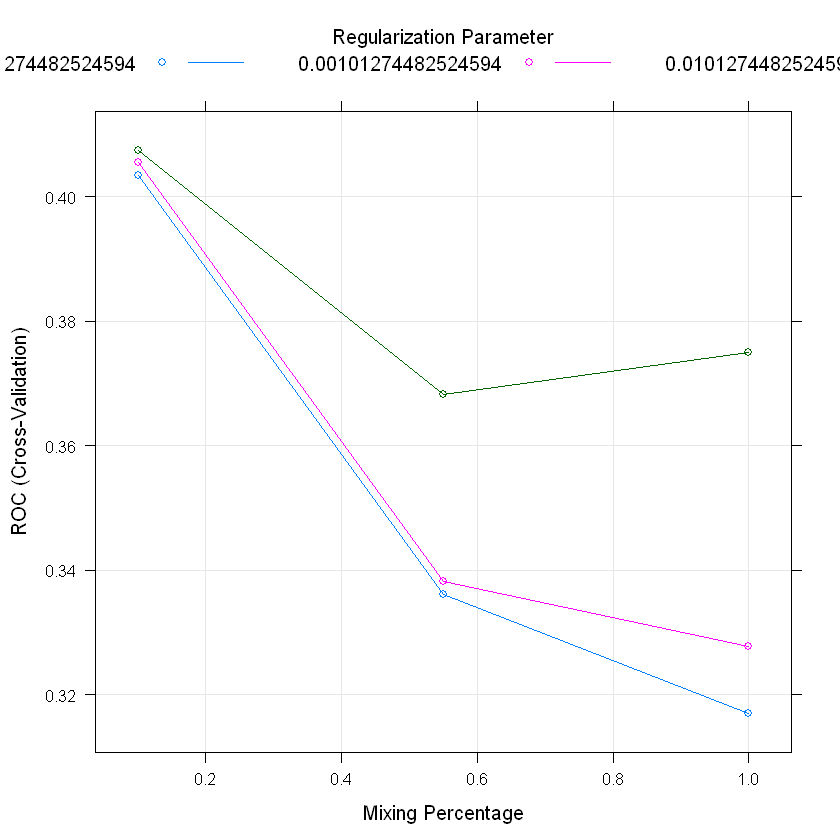

In [13]:
# Plot model
plot(model)

In [14]:
# Print maximum ROC statistic
max(model[["results"]][['ROC']])

[1] 0.4074275

In [16]:
# Train glmnet with custom trainControl and tuning: model
model <- train(
  y ~ ., overfit,
  tuneGrid = expand.grid(
    alpha = 0:1,
    lambda = seq(0.0001, 1, length = 20)),
  method = "glmnet",
  trControl = myControl
)

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=1 
- Fold01: alpha=0, lambda=1 
+ Fold01: alpha=1, lambda=1 
- Fold01: alpha=1, lambda=1 
+ Fold02: alpha=0, lambda=1 
- Fold02: alpha=0, lambda=1 
+ Fold02: alpha=1, lambda=1 
- Fold02: alpha=1, lambda=1 
+ Fold03: alpha=0, lambda=1 
- Fold03: alpha=0, lambda=1 
+ Fold03: alpha=1, lambda=1 
- Fold03: alpha=1, lambda=1 
+ Fold04: alpha=0, lambda=1 
- Fold04: alpha=0, lambda=1 
+ Fold04: alpha=1, lambda=1 
- Fold04: alpha=1, lambda=1 
+ Fold05: alpha=0, lambda=1 
- Fold05: alpha=0, lambda=1 
+ Fold05: alpha=1, lambda=1 
- Fold05: alpha=1, lambda=1 
+ Fold06: alpha=0, lambda=1 
- Fold06: alpha=0, lambda=1 
+ Fold06: alpha=1, lambda=1 
- Fold06: alpha=1, lambda=1 
+ Fold07: alpha=0, lambda=1 
- Fold07: alpha=0, lambda=1 
+ Fold07: alpha=1, lambda=1 
- Fold07: alpha=1, lambda=1 
+ Fold08: alpha=0, lambda=1 
- Fold08: alpha=0, lambda=1 
+ Fold08: alpha=1, lambda=1 
- Fold08: alpha=1, lambda=1 
+ Fold09: alpha=0, lambda=1 
- Fold09: alpha=0, lambda=1 
+ Fold09: alph

In [17]:
# Print model to console
model

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 225, 226, 225, 224, 225, 226, ... 
Resampling results across tuning parameters:

  alpha  lambda      ROC        Sens  Spec     
  0      0.00010000  0.4275362  0     0.9871377
  0      0.05272632  0.4123188  0     1.0000000
  0      0.10535263  0.4167572  0     1.0000000
  0      0.15797895  0.4190217  0     1.0000000
  0      0.21060526  0.4254529  0     1.0000000
  0      0.26323158  0.4404891  0     1.0000000
  0      0.31585789  0.4447464  0     1.0000000
  0      0.36848421  0.4534420  0     1.0000000
  0      0.42111053  0.4513587  0     1.0000000
  0      0.47373684  0.4513587  0     1.0000000
  0      0.52636316  0.4534420  0     1.0000000
  0      0.57898947  0.4556159  0     1.0000000
  0      0.63161579  0.4556159  0     1.0000000
  0      0.68424211  0.4556159  0     1.0000000
  0      0.73686842  0.4556159  0     1.0000000

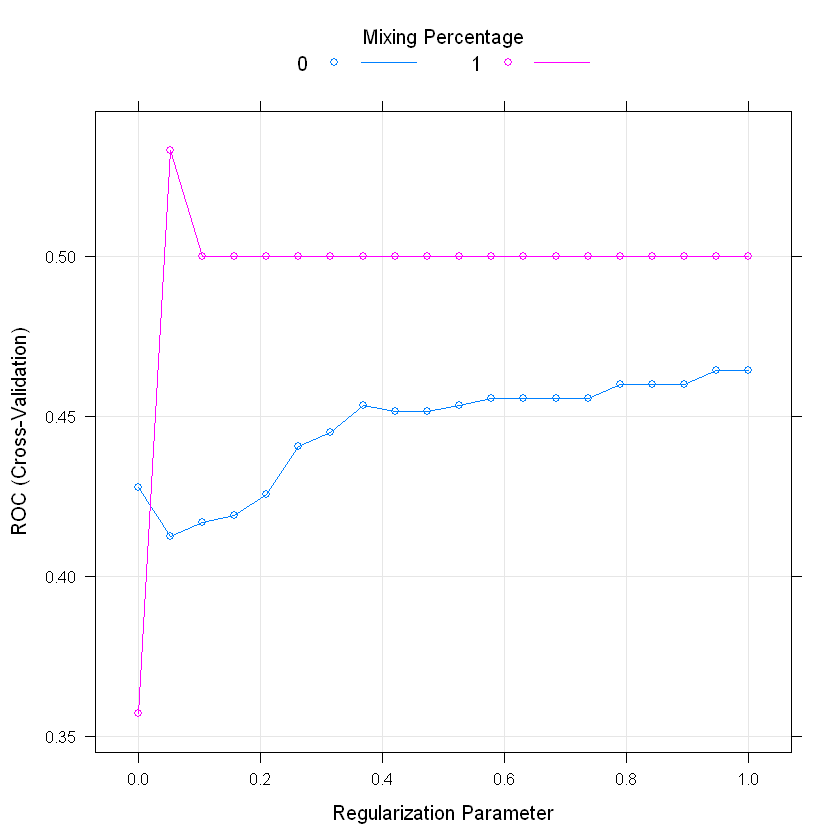

In [18]:
plot(model)

In [19]:
# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

[1] 0.532971